# Linking Writing Processes to Writing Quality

By: David Hartsman

<hr style="border: 4px solid black">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Dictionary/Reference:
File and Field Information
train_logs.csv - Input logs to be used as training data. To prevent reproduction of the essay text, all alphanumeric character inputs have been replaced with the "anonymous" character q; punctuation and other special characters have not been anonymized.

- id - The unique ID of the essay
- event_id - The index of the event, ordered chronologically
- down_time - The time of the down event in milliseconds
- up_time - The time of the up event in milliseconds
- action_time - The duration of the event (the difference between down_time and up_time)
- activity - The category of activity which the event belongs to
- Nonproduction - The event does not alter the text in any way
- Input - The event adds text to the essay
- Remove/Cut - The event removes text from the essay
- Paste - The event changes the text through a paste input
- Replace - The event replaces a section of text with another string
- Move From [x1, y1] To [x2, y2] - The event moves a section of text spanning character index x1, y1 to a new location x2, y2
- down_event - The name of the event when the key/mouse is pressed
- up_event - The name of the event when the key/mouse is released
- text_change - The text that changed as a result of the event (if any)
- cursor_position - The character index of the text cursor after the event
- word_count - The word count of the essay after the event


Note that there may be events in the test set that do not occur in the training set. Your solution should be robust to unseen events.

Note: Key_down and key_up events may not necessarily occur in the same order as they are presented in the dataset. To illustrate, a writer may press down "a" and then press down "b" before he/she even releases "a". However, all the keystroke information about "a" comes before "b" in the dataframe.

test_logs.csv - Input logs to be used as test data. Contains the same fields as train_logs.csv. The logs available in the public version of this file are only examples to illustrate the format.
train_scores.csv
id - The unique ID of the essay
score - The score the essay received out of 6 (the prediction target for the competition)
sample_submission.csv - A submission file in the correct format. See the Evaluation page for details.

#### Data loading

In [2]:
df = pd.read_csv('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/writing_quality/linking-writing-processes-to-writing-quality/train_logs.csv')

In [3]:
df.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405898 entries, 0 to 8405897
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   id               object
 1   event_id         int64 
 2   down_time        int64 
 3   up_time          int64 
 4   action_time      int64 
 5   activity         object
 6   down_event       object
 7   up_event         object
 8   text_change      object
 9   cursor_position  int64 
 10  word_count       int64 
dtypes: int64(6), object(5)
memory usage: 705.5+ MB


In [5]:
df.shape

(8405898, 11)

In [7]:
df["id"].duplicated().sum()

8403427

#### Labels: EDA

In [12]:
grades = pd.read_csv('/Users/samalainabayeva/Desktop/FLAT_IRON!!!/writing_quality/linking-writing-processes-to-writing-quality/train_scores.csv')

In [32]:
grades

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0
...,...,...
2466,ffb8c745,3.5
2467,ffbef7e5,4.0
2468,ffccd6fd,1.5
2469,ffec5b38,5.0


/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


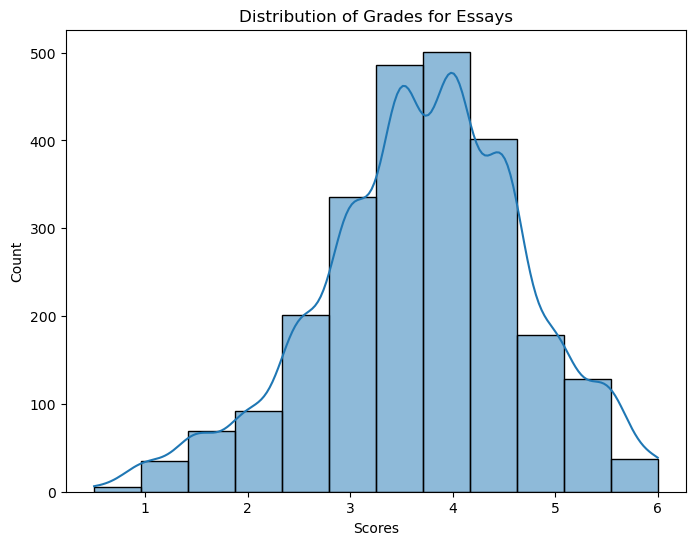

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=grades, x='score', ax=ax, kde=True, bins=12)
ax.set_title("Distribution of Grades for Essays")
ax.set_xlabel("Scores");

In [86]:
palette = sns.set_palette('tab10', n_colors=12)

<Axes: xlabel='score'>

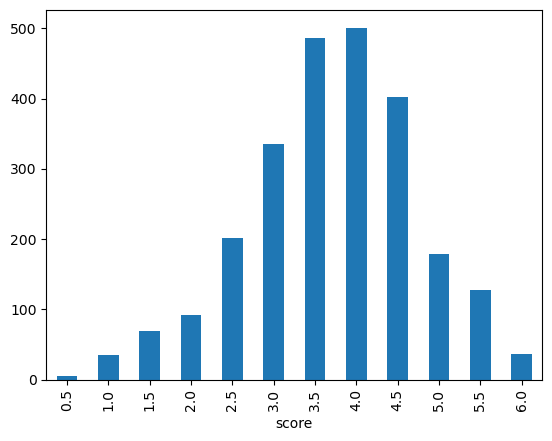

In [87]:
grades['score'].value_counts().sort_index().plot(kind="bar", cmap=palette)

In [80]:
grades['score'].value_counts().sort_index()

score
0.5      5
1.0     35
1.5     69
2.0     92
2.5    201
3.0    336
3.5    486
4.0    501
4.5    402
5.0    179
5.5    128
6.0     37
Name: count, dtype: int64

In [57]:
grades['score'].value_counts().shape

(12,)

/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/samalainabayeva/anaconda3/envs/david_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


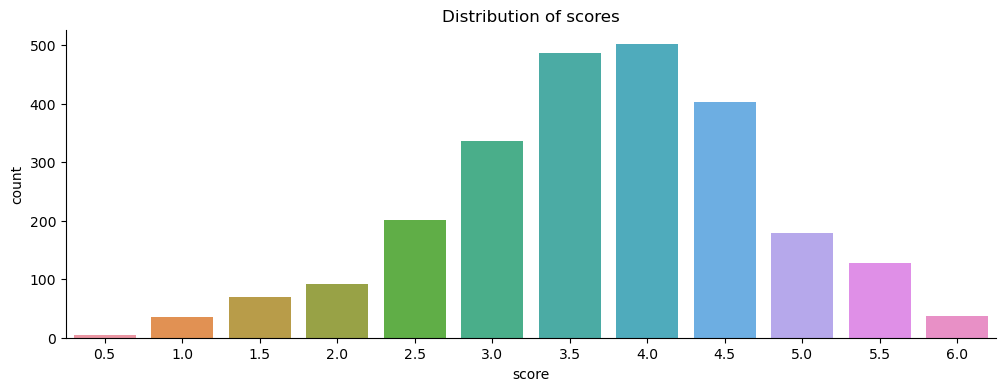

In [66]:
f, ax = plt.subplots(figsize=(12, 4))

# purely aesthetic -> removes right hand spine of the chart, leaving a borderless white space
sns.despine()

# countplot shows the counts of occurences within a categorical feature, so given that these scores are discrete and
# not continuous, the countplot might be preferable to the histplot, however as shown above, i tidied it up by 
# tailoring the number of bins to = 12, the same number of discrete score values
ax = sns.countplot(data=grades,
                   x="score")

ax.set_title("Distribution of scores");

In [14]:
grades.shape

(2471, 2)

In [16]:
df["id"].unique().shape

(2471,)

In [88]:
df["activity"].unique()

array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace',
       'Move From [284, 292] To [282, 290]',
       'Move From [287, 289] To [285, 287]',
       'Move From [460, 461] To [465, 466]', 'Paste',
       'Move From [905, 1314] To [907, 1316]',
       'Move From [565, 743] To [669, 847]',
       'Move From [669, 847] To [565, 743]',
       'Move From [1041, 1121] To [1496, 1576]',
       'Move From [1455, 1557] To [1323, 1425]',
       'Move From [2268, 2275] To [2247, 2254]',
       'Move From [213, 302] To [902, 991]',
       'Move From [0, 158] To [234, 392]',
       'Move From [460, 465] To [925, 930]',
       'Move From [810, 906] To [816, 912]',
       'Move From [186, 187] To [184, 185]',
       'Move From [140, 272] To [299, 431]',
       'Move From [114, 140] To [272, 298]',
       'Move From [1386, 1450] To [1445, 1509]',
       'Move From [442, 524] To [296, 378]',
       'Move From [408, 414] To [390, 396]',
       'Move From [1144, 1147] To [1142, 1145]',
       'Move 

In [33]:
df

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8405893,fff05981,3615,2063944,2064440,496,Nonproduction,Leftclick,Leftclick,NoChange,1031,240
8405894,fff05981,3616,2064497,2064497,0,Nonproduction,Shift,Shift,NoChange,1031,240
8405895,fff05981,3617,2064657,2064765,108,Replace,q,q,q => q,1031,240
8405896,fff05981,3618,2069186,2069259,73,Nonproduction,Leftclick,Leftclick,NoChange,1028,240


In [30]:
print('The average of the number of events per essay in the test dataset is : ' + str(df.groupby("id").max(numeric_only=True)["event_id"].mean().round(0)))

The average of the number of events per essay in the test dataset is : 3402.0


In [49]:
df.groupby("id").max(numeric_only=True)["event_id"].mean().round(0)

3402.0

In [53]:
df.groupby('id')["event_id"].max().mean().round(0)

3402.0

In [36]:
df.loc[df['id'] == '001519c8']["down_event"].unique()

array(['Leftclick', 'Shift', 'q', 'Space', 'Backspace', '.', ',', 'Enter',
       'ArrowLeft', "'", ';', 'ArrowRight'], dtype=object)

In [24]:
df.loc[df['id'] == '001519c8', 'event_id'].max()

2557

In [25]:
1279*2

2558

In [29]:
df.loc[df['id'] == '001519c8', 'event_id'].sum() / (df.loc[df['id'] == '001519c8', 'event_id'].shape[0])

1279.0

In [26]:
df.loc[df['id'] == '001519c8', 'event_id']

0          1
1          2
2          3
3          4
4          5
        ... 
2552    2553
2553    2554
2554    2555
2555    2556
2556    2557
Name: event_id, Length: 2557, dtype: int64

In [9]:
df['id']

0          001519c8
1          001519c8
2          001519c8
3          001519c8
4          001519c8
             ...   
8405893    fff05981
8405894    fff05981
8405895    fff05981
8405896    fff05981
8405897    fff05981
Name: id, Length: 8405898, dtype: object

In [11]:
df[df['id'] == '001519c8']

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2552,001519c8,2553,1781786,1781841,55,Remove/Cut,Backspace,Backspace,q,555,255
2553,001519c8,2554,1781917,1781991,74,Remove/Cut,Backspace,Backspace,q,554,255
2554,001519c8,2555,1782062,1782141,79,Remove/Cut,Backspace,Backspace,q,553,255
2555,001519c8,2556,1782922,1782985,63,Input,q,q,q,554,255


In [ ]:
df